## 使用回归分析预测连续型目标变量
### 线性回归模型
简单线性回归，一元线性方程  
$y=w_{0} + w_{1}x$  
多元线性回归   
$y=w_{0}x_{0} + w_{1}x_{1} + ... + w_{m}x_{m} = \sum_{i=0}^{n}w_{i}x_{i}=w^{T}x$


In [1]:
%matplotlib inline

import pandas as pd
# 加载波士顿房屋数据集
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


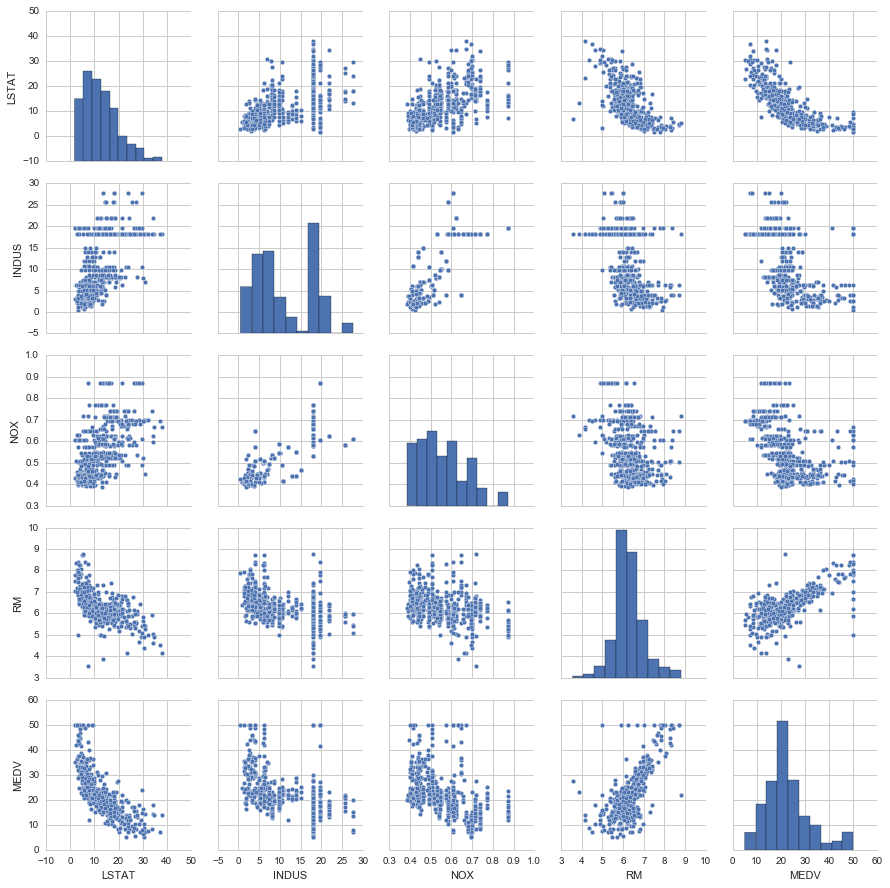

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# 使用seaborn绘制两两之间的关系
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.show()
# 通过散点图我们可以了解数据的分布，以及是否包含异常值。
# 通过下图可以看到RM和房屋价格MEDV之间存在线性关系，MEDV看似呈正态分布，但是包含异常值。

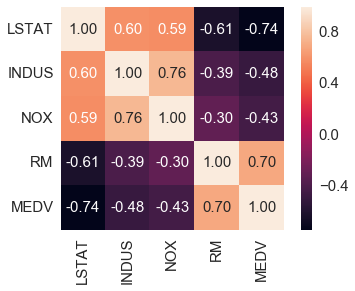

In [3]:
import numpy as np
# 计算相关系数矩阵，取值范围-1到1，1代表完全正相关，0代码不纯在相关关系，-1则完全负相关。
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
# 使用heatmap绘制相关系数矩阵热点图。
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols,
                xticklabels=cols)
plt.show()
# 为了拟合线性回归模型，我们主要关注选择跟目标变量MEDV高度相关的特征。

In [4]:
import numpy as np

# 和第二章的Adaline分类器的代码一模一样，去掉了最后的分类函数，直接返回结果。
class LinearRegressionGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------------------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    ------------------------------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of missclassifications in every epoch

    """

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ------------------------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number
            of samples and n_features the number of features.
        y : array-like, shape = [n_samples]
            Target values

        Returns
        ------------------------------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return self.net_input(X)


In [5]:
X = df[['RM']].values
y = df[['MEDV']].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y).ravel()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

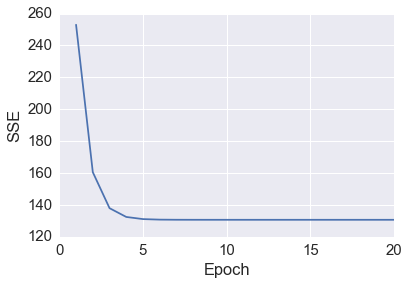

In [6]:
# 绘制迭代次数与收敛图
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [7]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

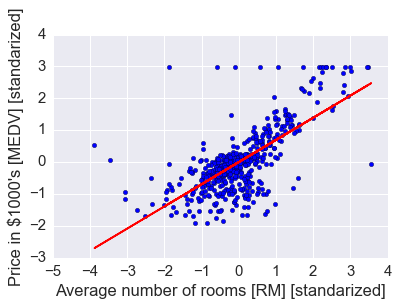

In [8]:
# 绘制房间数RM与房屋价钱MEDV的关系图。
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] [standarized]')
plt.ylabel('Price in $1000\'s [MEDV] [standarized]')
plt.show()
# 下图可以看出当Y=3时，房价被限定了上界，所以我们需要考虑在限定原始取值范围。

In [9]:
# 预测5个房间的房屋价格。
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000's: 10.840


In [10]:
print('Slope: %.3f'% lr.w_[1])

Slope: 0.695


In [11]:
# 在y轴上截距为0
print('Intercept: %.3f' % lr.w_[0])

Intercept: -0.000


In [12]:
# 使用sklearn的线性回归
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])

Slope: 9.102


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [13]:
print('Intercept: %.3f' % slr.intercept_)

Intercept: -34.671


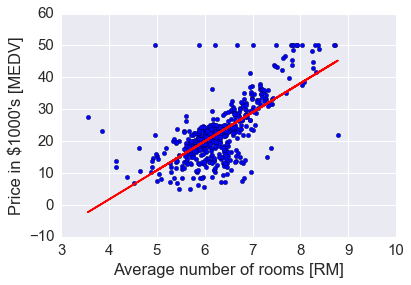

In [14]:
# 绘制图像，可以看到和我们自己模型实现的模型是一致的。
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

### 使用RANSAC拟合高鲁棒性回归模型
随机抽样一致性(Random Sample Consensus, RANSAC)算法，作为清除异常值的一种高鲁棒性回归方法，算法工作流程如下：
1. 从数据集中随机抽样构建内点集合来拟合模型
2. 使用剩余数据来对上一步得到的模型进行测试，并将落在预订公差范围内的样本点增至内点集合中
3. 使用全部内点数据集再次进行模型的拟合
4. 使用内点集合估计模型的误差
5. 如果模型性能达到了用户设定的特定阈值或者迭代到了预定次数，则算法停止，否则跳转到第一步

In [15]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        # residual_metric=lambda x: np.sum(np.abs(x),axis=1),
                        residual_threshold=5.0,
                        random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

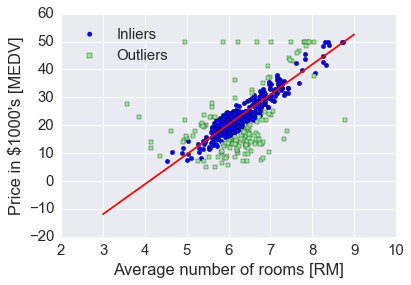

In [16]:
# 绘制图形，内点和异常点
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [17]:
# 查看斜率和截距
print('Slope: %.3f' % ransac.estimator_.coef_[0])

Slope: 10.735


In [18]:
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Intercept: -44.089


### 线性回归模型性能评估

In [19]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

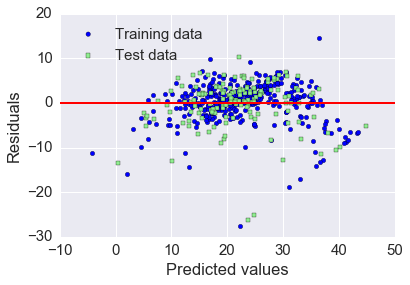

In [20]:
# 绘制残差图像
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

MSE(均方误差)   
$MSE = \frac{1}{n}\sum_{i=1}^{n}\left (y^{(i)} - \hat{y}^{(i)}\right)^{2} $   

$R^{2}$预测值的方差   
   
$R^{2} = 1 - \frac{SSE}{SST}$   
SSE为误差平方和    
$SSE = \sum_{i=1}^{n}\left (y^{(i)} - \hat{y}^{(i)}\right)^{2} $  
$SST = \sum_{i=1}^{n}\left (y^{(i)} - \mu _{y}\right)^{2} $  

将SSE、SST带入并上下都除以1/n得到结果   
$R^{2} = 1 - \frac{SSE}{SST} = 1 - \frac{MSE}{Var(y)}$   

In [21]:
# 使用均方误差（Mean Squared Error, MSE）来评估
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train,y_train_pred), 
    mean_squared_error(y_test,y_test_pred)))
# 可以看到我们的模型已经过拟合了

MSE train: 19.958, test: 27.196


In [22]:
# 决定系数（coefficient of determination）（R2），MSE的标准化版本，用于更好的解释模型的性能
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred)))

R^2 train: 0.765, test: 0.673


### 回归中的正则化

In [23]:
# 岭回归（L2正则化）
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [24]:
# LASSO回归（L1正则化）
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [25]:
# ElasticNet是L1和L2的合并，如果将l1_ratio=0，alpha=1就是L2
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(alpha=1.0, l1_ratio=0.5)

### 多项式回归

In [26]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
# 增加一个二次多项式
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [27]:
# 拟合一个简单线性回归模型
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

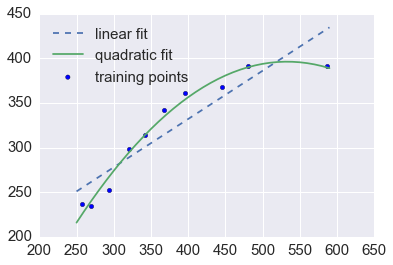

In [28]:
# 多项式回归
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# 绘制图形进行对比
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

In [29]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f' % (
    mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330


In [30]:
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
    r2_score(y,y_lin_pred), r2_score(y,y_quad_pred)))
# 可以看到数据有非常大的提升，二次拟合在此问题上效果更佳

Training R^2 linear: 0.832, quadratic: 0.982


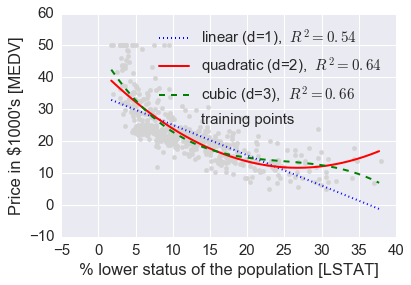

In [31]:
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()

# Create polynomial features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# Linear fit
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# quadratic fit
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# cubic fit
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plot results
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1),  $R^2=%.2f$' % linear_r2,  color='blue',  lw=2,  linestyle=':')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2),  $R^2=%.2f$' % quadratic_r2,  color='red',  lw=2,  linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3),  $R^2=%.2f$' % cubic_r2,  color='green',  lw=2,  linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')
plt.show()
# 可以看到三项式的效果对数据拟合的最好

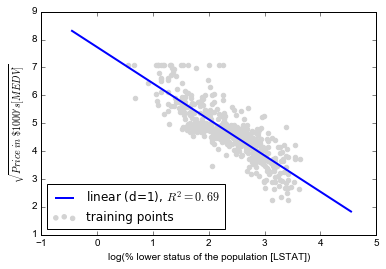

In [32]:
# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
sns.reset_orig()
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')
plt.show()
# R^2=0.69 看似优于前面使用的任何一种多项式回归

### 使用随机森林处理非线性关系

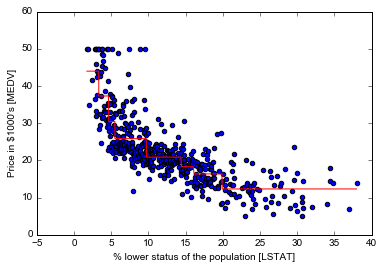

In [33]:
# 使用决策树对MEDV和LSTAT的非线性关系进行建模
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

In [34]:
# 使用随机森林对所有数据进行拟合，与前面第三章不同的是随机森林使用mse作为单颗树的评估标准
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, 
                              criterion='mse', 
                              random_state=1, 
                              n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
# 可以看到对训练数据有些过拟合，不过，它仍然能够比较好地理解目标变量与解释变量之间的关系。

MSE train: 1.642, test: 11.052
R^2 train: 0.979, test: 0.878


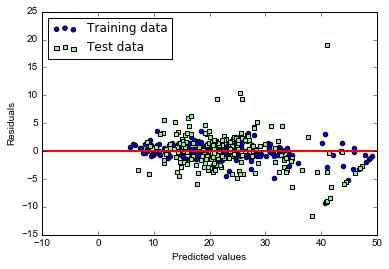

In [35]:
# 残差图
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10,50])
plt.show()
# 残差没有完全随机分布在中心点附近，这意味着模型无法捕获所有的解释信息。对比前面的模型，已经有很大的改进。